**Protyush Kumar Das (pdas2s)**<br>
**Somesh Devagekar (sdevag2s)**

# Build a spam classifier using Naive Bayes

## Project Description: 
- There are three datasets for training: TrainDataset1.csv, TrainDataset2.csv and TrainDataset3.txt. Each dataset contains short messages with the labels (ham or spam). 
- Analyse, clean and visualise these datasets.
- Combine them into one big data set for the training
- Use this dataset in order to build your own Naive Bayes classifier. (You can either use existing Naive Bayes from sklearn or build your own one)
- Verify your Classifier using new messages (create your own messages or use the messages from the TestDataset.csv dataset).

## Project Duration: 2 weeks
## Project Deliverables:
1. End of the first week do Data preprocessing: 
    - Load the dataset using pandas, 
    - Analysis it for this you will need to process the text, namely remove punctuation and stopwords, and then create a list of clean text words. (Research how to do this) 
    - Visualise the results
    - Prepare the pre-processed data for the usage by Naive Bayes Classifier
2. End of the second week:
    - Train the classifier,
    - Validate it, build confusion matrix, analyse its results
    - Apply it to new test messages,
    - Try to cheat the classifier by adding "good words" to the end of test message.

You can use the following link can be used as guidance for implementation:
https://towardsdatascience.com/spam-filtering-using-naive-bayes-98a341224038

**Loading the data and concatenating into one**

In [16]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt


D_1=pd.read_csv('TrainDataset1.csv')
D_2=pd.read_csv('TrainDataset2.csv')
D_2.rename(columns={'v1': 'type', 'v2': 'text'}, inplace=True)
D_3=pd.read_csv('TrainDataset3.txt', sep=r"\t+", header=None ,engine="python")
D_3=D_3.rename(columns={0: "type", 1: "text"}, errors="raise")

TrainDataset=pd.concat([D_3,D_2,D_1])
TrainDataset.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Cleaning and labeling loaded data concatenated into one**

In [21]:
TrainDataset = TrainDataset.sample(frac=1).reset_index(drop=True) # scattering dataset increase randomness
type_of_text = list(TrainDataset["type"])
labels = list()
for item in type_of_text:
    if item == "ham":
        labels.append(0)
    else:
        labels.append(1)

        
TrainDataset["label"] = labels

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text


TrainDataset['text'] = TrainDataset['text'].apply(remove_punctuations)
TrainDataset.head()


,type,text,label
0,ham,Yes I am a one woman man Please tell me your l...,0
1,ham,I gotta collect da car at 6 lei,0
2,ham,Jus finish bathing,0
3,ham,They said if its gonna snow it will start arou...,0
4,ham,Yup next stop,0


**Visualizing raw data concatenated**

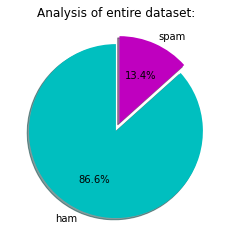

In [35]:
one = TrainDataset['label'].astype(bool).sum(axis=0)
slices = [len(TrainDataset['label'])-one,one]
activities = ['ham','spam']
cols = ['c','m']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1),
        autopct='%1.1f%%')

plt.title('Analysis of entire dataset:')
plt.show()